In [1]:
import sys
sys.path.append('../')
from math import radians, sin

In [2]:
%matplotlib widget

In [3]:
import numpy as np
import angle as model
from IPython.display import display, Markdown
import ipywidgets as widgets
from demo import *
from ipycanvas import Canvas, hold_canvas
import matplotlib.pyplot as plt

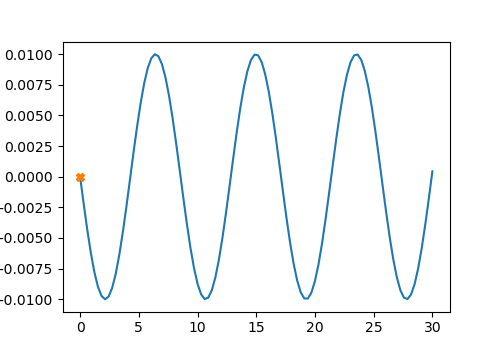

In [4]:
m = model.Angle(9, 3, 0.2)
t = np.linspace(0, 30, 100)
w_0 = m.circular_frequency().real()
y = m.evaluate(t)
plot = Plot(t, y)
c = model.AngleCanvas(m, plot, L=100)
# fig.tight_layout()
m.params.append(ChangeableContainer([c.play_btn]))
demo = Demo(m.params, m, drawable=widgets.HBox([c.canvas, plot.widget]))

In [5]:
def pingpong(canvas, width, height):
    sx = x = 50
    ex = 150
    ping = True
    i = 0
    while True:
        x += 2 if ping else -2
        i += 5
        if ping and x >= ex:
            ping = False
        if not ping and x <= sx:
            ping = True
        with hold_canvas(canvas):
            canvas.clear()
            canvas.fill_rect(x, 50, width, height)
            canvas.fill_rects(np.array([sx, ex + width]), np.array([20, 20]), np.array([1, 1]), np.array([50, 50]))
        canvas.sleep(20)

In [6]:
import threading
t = threading.Thread(target=pingpong, args=(c.canvas, 15, 15))
#t2 = threading.Thread(target=pingpong, args=(ch, 30, 15))

In [7]:
#th = threading.Thread(target=oscilate, args=(c, m))

In [8]:
#th.start()

In [9]:
demo.show()

Output()

In [10]:
#plot.mark(5.15, m.evaluate(5.15).real())

In [11]:
def upd_marker(args):
    plot.mark(m.t.real(), m.evaluate(m.t.real()).real())
m.observe(upd_marker)